In [1]:
import numpy as np 
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

# Loading the Images

In [2]:
X = []
Y = []

active_subjects_dir = r'train\Active_Subjects'
fatigue_subjects_dir = r'train\Fatigue_Subjects'

# Mencari gambar dalam direktori active_subjects_dir
for file_path in tqdm(glob(os.path.join(active_subjects_dir, '*.*'))):
    temp = np.array(Image.open(file_path).resize((150, 150)))
    X.append(temp)
    Y.append(1)

# Mencari gambar dalam direktori fatigue_subjects_dir
for file_path in tqdm(glob(os.path.join(fatigue_subjects_dir, '*.*'))):
    temp = np.array(Image.open(file_path).resize((150, 150)))
    X.append(temp)
    Y.append(0)

100%|██████████| 4560/4560 [03:08<00:00, 24.24it/s]


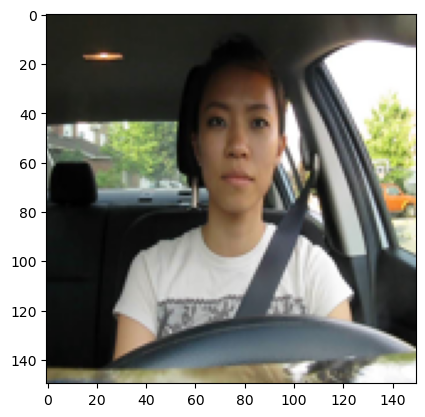

In [3]:
# Pilih gambar dari dataset yang ingin Anda lihat
selected_image = X[5]

# Invers normalisasi: mengalikan kembali dengan 255
# original_image = (selected_image * 255.0).astype('uint8')

# Hilangkan dimensi yang tidak diperlukan jika diperlukan
original_image = selected_image.squeeze()

# Tampilkan gambar
plt.imshow(original_image)
plt.show()

## Normalizing the images (with any algorithm)

In [4]:
X = np.array(X)
X = X/255.0
Y = np.array(Y)

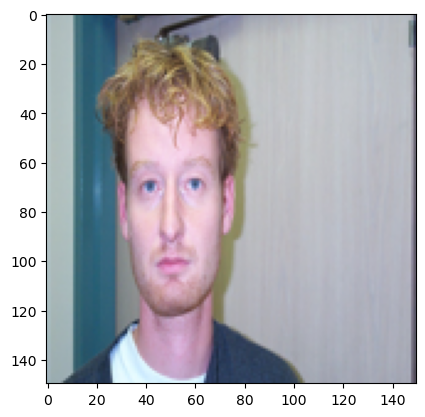

In [5]:
# Pilih gambar dari dataset yang ingin Anda lihat
selected_image = X[99]

# Invers normalisasi: mengalikan kembali dengan 255
# original_image = (selected_image * 255.0).astype('uint8')

# Hilangkan dimensi yang tidak diperlukan jika diperlukan
original_image = selected_image.squeeze()

# Tampilkan gambar
plt.imshow(selected_image)
plt.show()

## Spliting the dataset into training and testing data

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## CNN Model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(150, 150, 3)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 128, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 64, use_bias=False, activation = 'relu'),

      Dense(units = 42, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

## Compiling the Model

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

## Training of the Model

In [13]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel7.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
153/153 [==============================] - ETA: 0s - loss: 0.4805 - accuracy: 0.7696
Epoch 1: val_loss improved from inf to 0.86756, saving model to bestModel7.h5
153/153 [==============================] - 203s 1s/step - loss: 0.4805 - accuracy: 0.7696 - val_loss: 0.8676 - val_accuracy: 0.4894
Epoch 2/30
153/153 [==============================] - ETA: 0s - loss: 0.4012 - accuracy: 0.8153
Epoch 2: val_loss improved from 0.86756 to 0.43966, saving model to bestModel7.h5
153/153 [==============================] - 198s 1s/step - loss: 0.4012 - accuracy: 0.8153 - val_loss: 0.4397 - val_accuracy: 0.7545
Epoch 3/30
153/153 [==============================] - ETA: 0s - loss: 0.3603 - accuracy: 0.8367
Epoch 3: val_loss improved from 0.43966 to 0.36855, saving model to bestModel7.h5
153/153 [==============================] - 205s 1s/step - loss: 0.3603 - accuracy: 0.8367 - val_loss: 0.3686 - val_accuracy: 0.8322
Epoch 4/30
153/153 [==============================] - ETA: 0s - loss: 0.35

## Model Evaluation

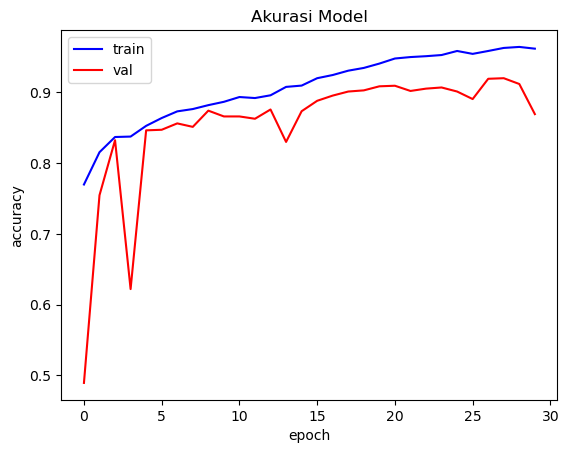

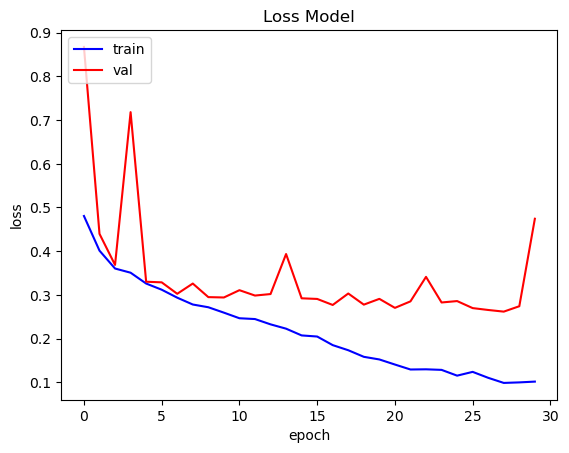

In [18]:
import matplotlib.pyplot as plt

# Access history attributes with dot notation
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(acc, color='blue')
plt.plot(val_acc, color='red')
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [19]:
model.evaluate(x_test, y_test)

95/95 [==============================] - 27s 278ms/step - loss: 0.4860 - accuracy: 0.8664


[0.4859556257724762, 0.8664451837539673]

## Loading the Model Performance

In [22]:
from keras.models import load_model
best_model = load_model('bestModel7.h5')
#best_model.evaluate(x_test, y_test)
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 146, 146, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 142, 142, 32)      25600     
                                                                 
 batch_normalization_4 (Batc  (None, 142, 142, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 71, 71, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 71, 71, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 64)       

In [23]:
import pickle

with open('bestModel7.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

INFO:tensorflow:Assets written to: ram://9c52fe46-92ef-433d-94a2-570ffd2656e6/assets


INFO:tensorflow:Assets written to: ram://9c52fe46-92ef-433d-94a2-570ffd2656e6/assets


In [31]:
with open('bestModel7.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://a269f0cf-ff0f-4226-95f5-e60dac84af74/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

## Changing the dimensions and Plotting the trained images

1/1 [==============================] - 0s 451ms/step


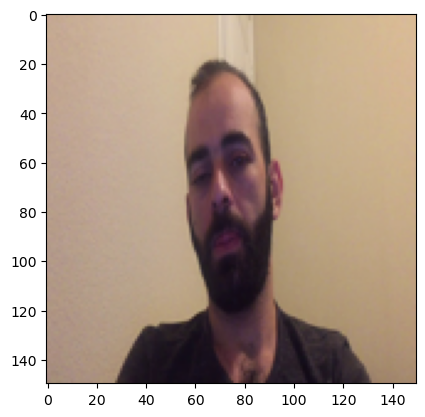

Kelelahan!
1/1 [==============================] - 0s 45ms/step


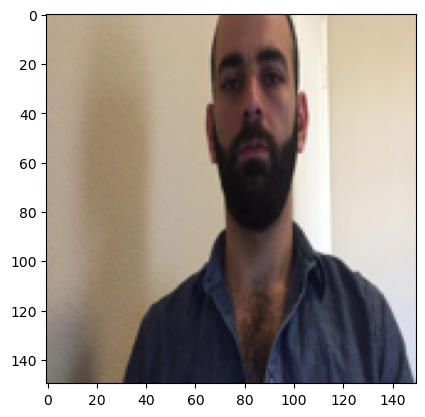

Seger Banget!
1/1 [==============================] - 0s 39ms/step


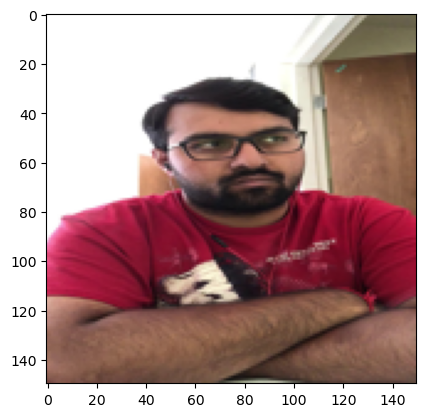

Kelelahan!
1/1 [==============================] - 0s 40ms/step


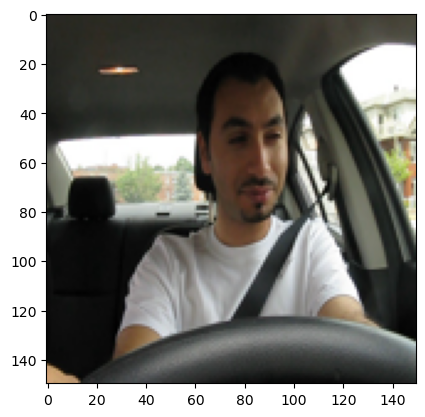

Kelelahan!
1/1 [==============================] - 0s 37ms/step


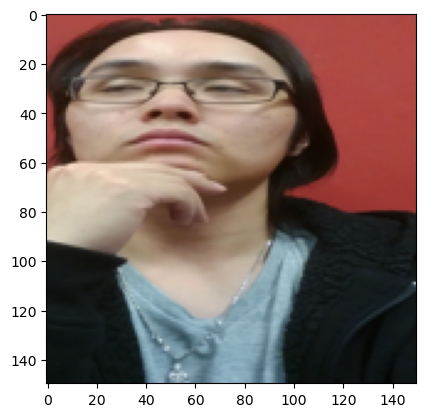

Kelelahan!
1/1 [==============================] - 0s 48ms/step


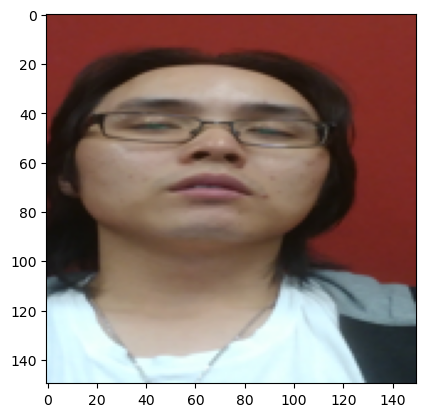

Kelelahan!
1/1 [==============================] - 0s 35ms/step


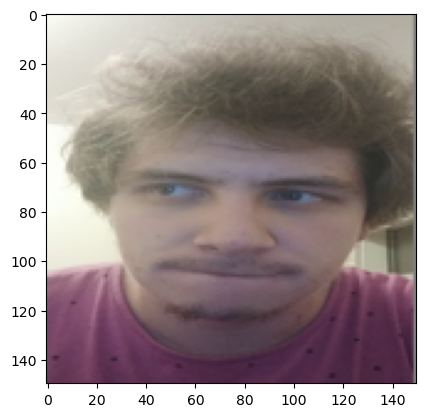

Seger Banget!
1/1 [==============================] - 0s 48ms/step


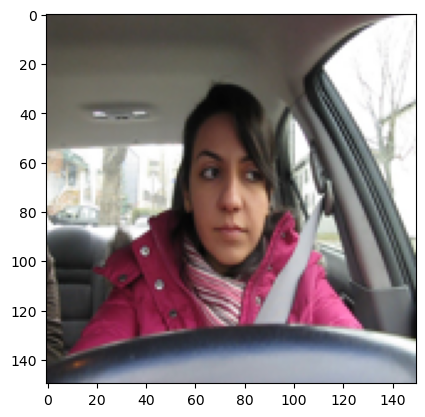

Seger Banget!
1/1 [==============================] - 0s 50ms/step


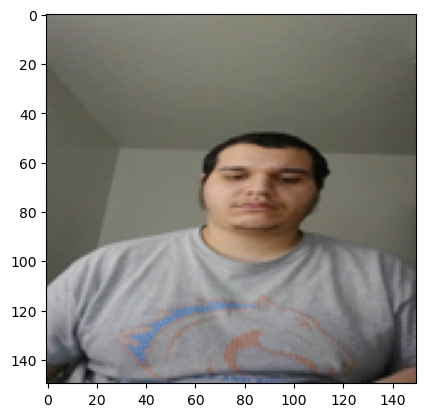

Kelelahan!
1/1 [==============================] - 0s 33ms/step


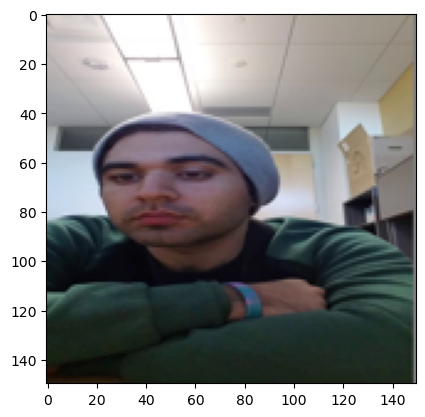

Seger Banget!
1/1 [==============================] - 0s 50ms/step


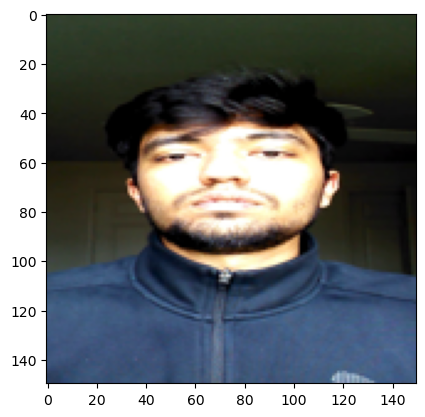

Kelelahan!
1/1 [==============================] - 0s 35ms/step


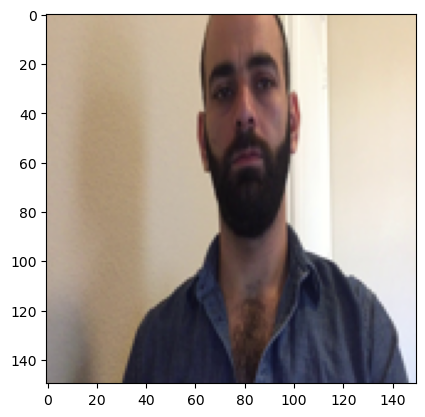

Seger Banget!
1/1 [==============================] - 0s 36ms/step


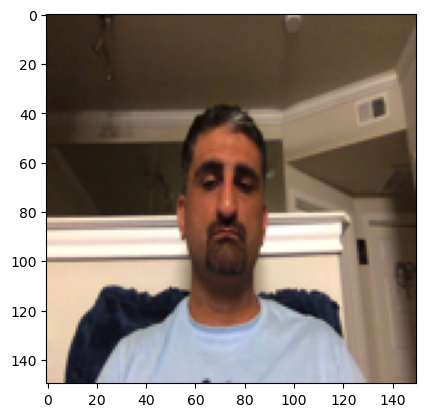

Kelelahan!
1/1 [==============================] - 0s 43ms/step


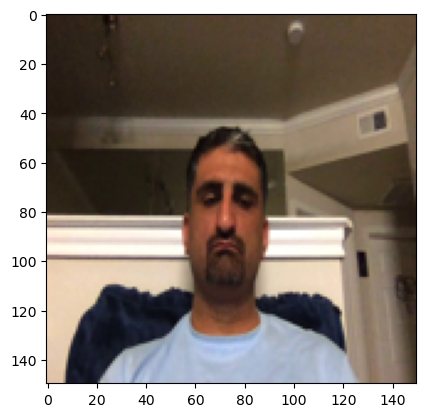

Kelelahan!
1/1 [==============================] - 0s 34ms/step


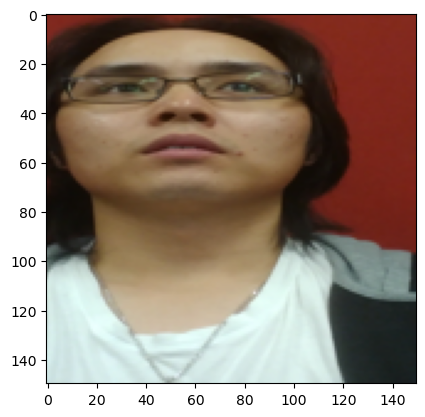

Seger Banget!
1/1 [==============================] - 0s 35ms/step - loss: 8.0834e-04 - accuracy: 1.0000
Sampel 1 - Akurasi: 1.0
Sampel 2 - Akurasi: 1.0
Sampel 3 - Akurasi: 0.0
Sampel 4 - Akurasi: 1.0
Sampel 5 - Akurasi: 1.0
Sampel 6 - Akurasi: 1.0
Sampel 7 - Akurasi: 1.0
Sampel 8 - Akurasi: 1.0
Sampel 9 - Akurasi: 1.0
Sampel 10 - Akurasi: 1.0
Sampel 11 - Akurasi: 1.0
Sampel 12 - Akurasi: 1.0
Sampel 13 - Akurasi: 1.0
Sampel 14 - Akurasi: 1.0
Sampel 15 - Akurasi: 1.0


In [32]:
accuracies = []  # Membuat list untuk menyimpan akurasi

for i, image in enumerate(x_test[0:15]):
    result = best_model.predict(np.expand_dims(image, 0))
    
    # Kembalikan gambar ke dalam rentang [0, 255] dari [0, 1] jika sudah dinormalisasi
    i_display = image.squeeze() * 255 if np.max(image) <= 1 else image.squeeze()
    
    plt.imshow(i_display.astype('uint8'))  # Pastikan tipe data adalah uint8
    plt.show()
    
    if result > 0.5:
        print('Seger Banget!')
    else:
        print('Kelelahan!')
    
    # Mengambil akurasi dari model untuk data saat ini
    accuracy = best_model.evaluate(np.expand_dims(image, 0), np.array([y_test[i]]))[1]
    accuracies.append(accuracy)  # Menyimpan akurasi dalam list

# Mencetak akurasi untuk setiap percobaan
for i, acc in enumerate(accuracies):
    print(f"Sampel {i+1} - Akurasi: {acc}")

## Prediction and Confusion Matrix

95/95 [==============================] - 23s 239ms/step


Text(0.5, 25.722222222222214, 'Actual')

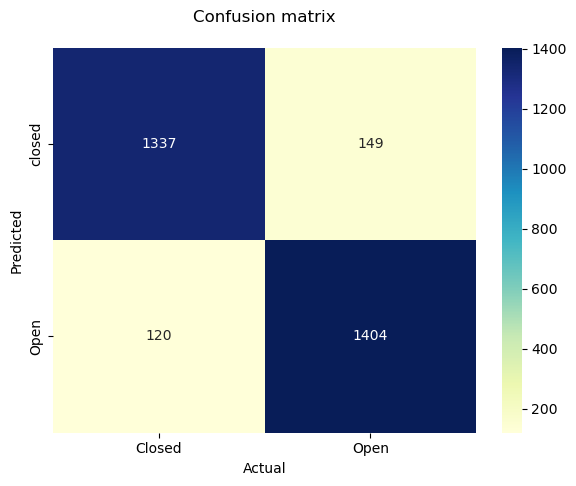

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

## Accuracy
Evaluating the Accuracy

In [30]:
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

95/95 [==============================] - 9s 98ms/step - loss: 0.3089 - accuracy: 0.8608
Accuracy: 0.8607973456382751
